In [1]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]  # we want large, uniformly-sized plots

sys.path[0:0] = ['.', '..']               # the centrifuge library files are located in ../centrifuge

from centrifuge.binfile import BinFile

In [14]:
path = "/mnt/9b78035a-08d5-49c3-bdd5-5d0377f3b936/centrifuge-archive/files/firmware/ford/DBW_Kit_FORD_20200221/Firmware/FORD_P5/ford_steer_slice.bin"
file_handle = open(path, "rb")
ford = BinFile(file_handle)

ford.set_block_size(1024)
ford.slice_file()

In [15]:
ford.file_data_frame

,entropy,zeroes ratios,ascii ratios,byte value std dev,byte value counts std dev,byte value mean,byte value median
0,0.865878,0.879883,0.000000,31.688839,56.270760,9.356445,0
1,0.648078,0.906250,0.000000,27.532384,57.936522,7.205078,0
2,0.000000,1.000000,0.000000,0.000000,63.874878,0.000000,0
3,0.000000,1.000000,0.000000,0.000000,63.874878,0.000000,0
4,0.000000,1.000000,0.000000,0.000000,63.874878,0.000000,0
...,...,...,...,...,...,...,...
128,5.516962,0.237305,0.098633,76.487483,16.206673,66.797852,35
129,5.616431,0.242188,0.000000,70.801918,16.315732,66.580078,36
130,4.763787,0.379883,0.069336,79.171296,24.692800,53.741211,7
131,5.170629,0.308594,0.067383,74.701001,20.345838,59.854492,20


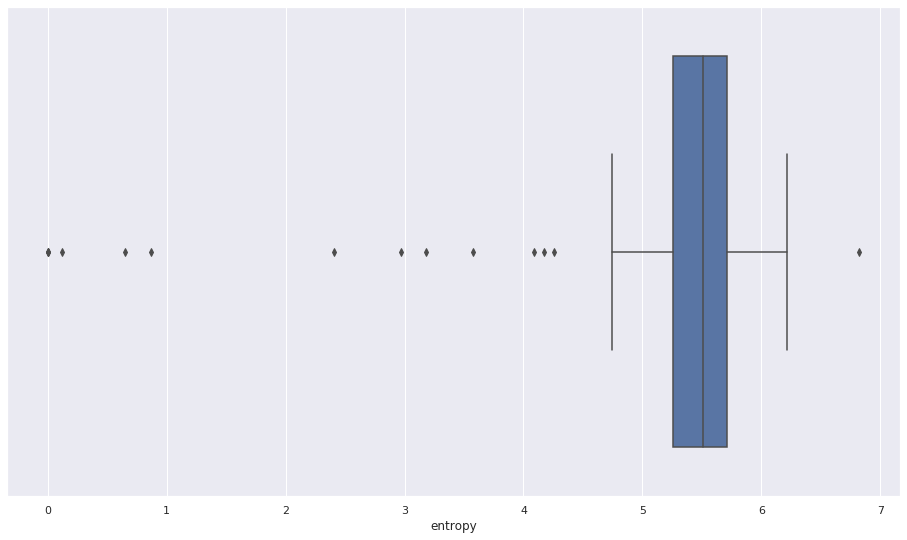

In [16]:
sns.boxplot(ford.file_data_frame["entropy"])

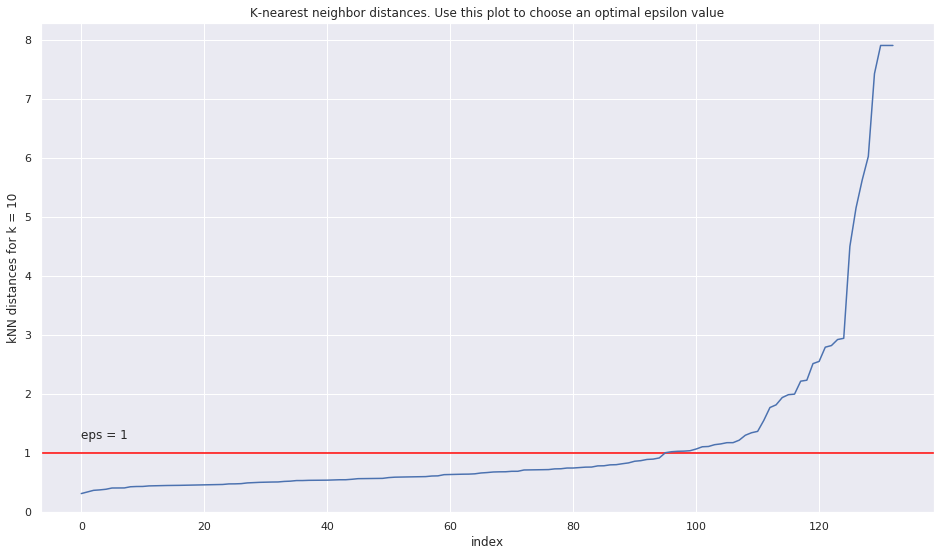

In [19]:
ford.cluster_DBSCAN(epsilon=1,      
                    minimum_samples=10,
                    find_optimal_epsilon=True)    # don't show "knee" plot here

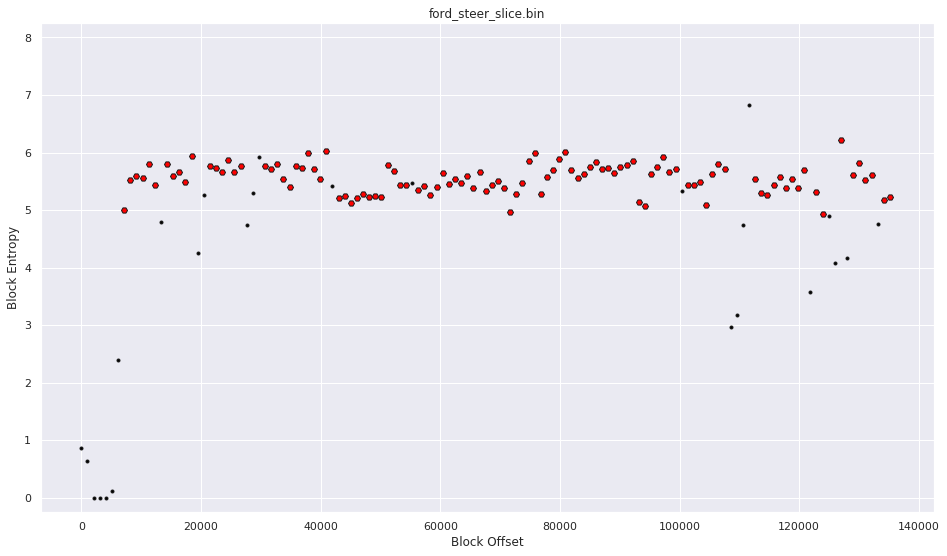

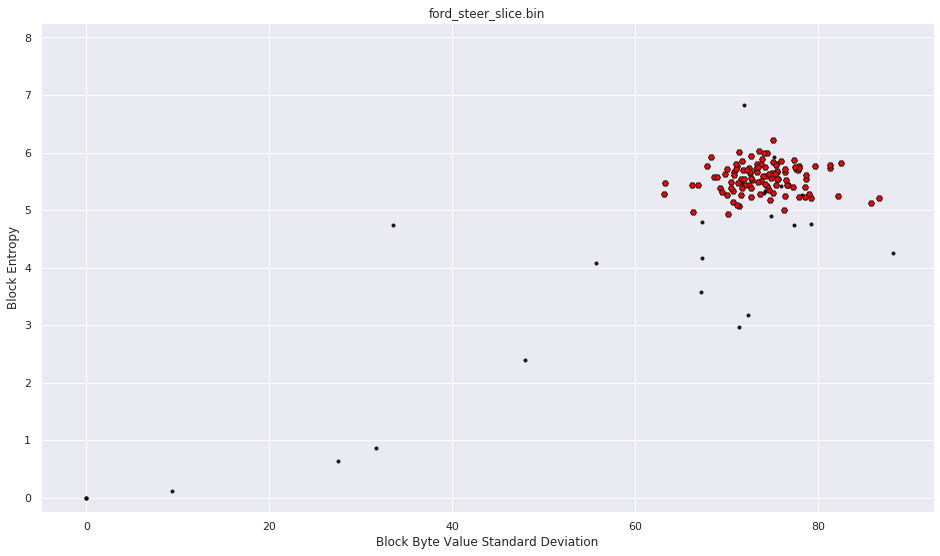

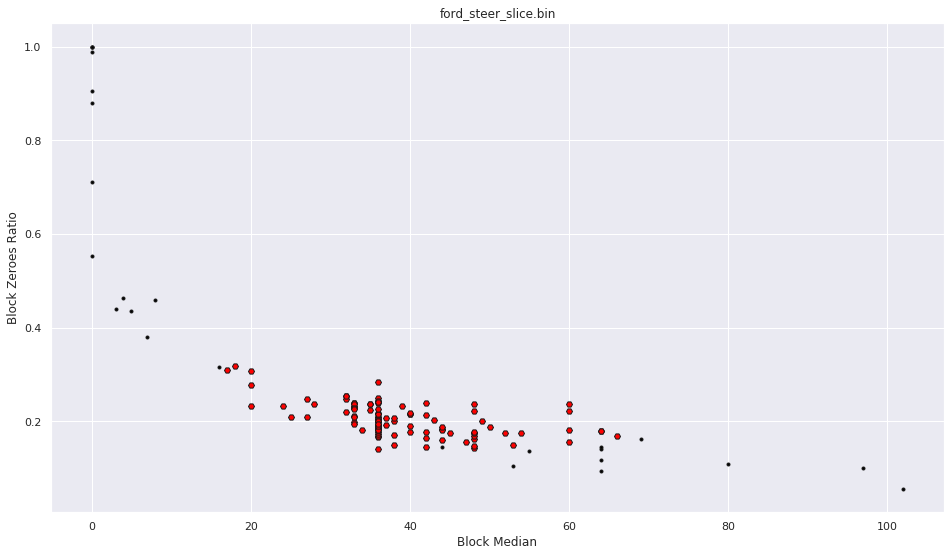

In [20]:
ford.plot_DBSCAN_results()

In [24]:
results = ford.identify_cluster_data_types()

Searching for machine code
--------------------------------------------------------------------

[+] Checking Cluster 0 for possible match
[+] Closely matching CPU architecture reference(s) found for Cluster 0
[+] Sending sample to https://isadetect.com/
[+] response:

{
    "prediction": {
        "architecture": "mips",
        "endianness": "little",
        "wordsize": 32
    },
    "prediction_probability": 0.62
}


Searching for utf8-english data
-------------------------------------------------------------------

[X] No UTF-8 (english) cluster detected.


Searching for high entropy data
-------------------------------------------------------------------

[X] No high entropy data cluster detected.



In [23]:
import pickle
refpath = "/mnt/9b78035a-08d5-49c3-bdd5-5d0377f3b936/centrifuge-toolkit/centrifuge/distributions/cpu_architectures/MIPSEL_reference"

MIPSEL_reference = None
with open(refpath, "rb") as f:
    MIPSEL_reference = pickle.load(f)

In [26]:
cluster_df, cluster_byte_values = ford.extract_clusters()

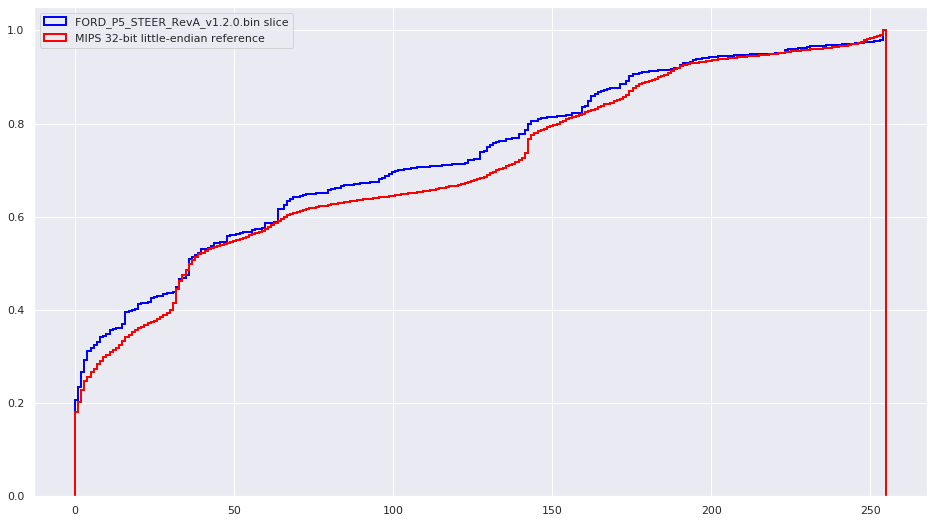

In [29]:
sns.distplot(cluster_byte_values[0], # calling list() on the binary data automatically converts bytes to int values
             norm_hist=True,     # normalize the y-axis. Different clusters have different numbers of blocks.
             kde=False,
             hist_kws={'histtype':'step', 'cumulative': True, 'linewidth':2, 'alpha':1},
             kde_kws={'cumulative': True},  # want CDF
             bins=256,
             color="blue")

sns.distplot(MIPSEL_reference, # calling list() on the binary data automatically converts bytes to int values
             norm_hist=True,     # normalize the y-axis. Different clusters have different numbers of blocks.
             kde=False,
             hist_kws={'histtype':'step', 'cumulative': True, 'linewidth':2, 'alpha':1},
             kde_kws={'cumulative': True},  # want CDF
             bins=256,
             color="red")

plt.legend(["FORD_P5_STEER_RevA_v1.2.0.bin slice", "MIPS 32-bit little-endian reference"], loc="upper left")
plt.show()

In [30]:
results

{'machine code': [{'Cluster 0': [30.213175104773637,
    {'MIPS64EL_reference': 17.566474244383244,
     'PowerPC_reference': 18.222447706116824,
     'i386_reference': 41.5143005673286,
     'ARMEL_reference': 47.324946067328604,
     'MIPSEL_reference': 6.542183085519641,
     'PPC64_reference': 32.308628659008555,
     'AMD64_reference': 37.5769445673286,
     'ARM64_reference': 36.371692067328595,
     'SH4_reference': 35.04822135418176}]},
  {'prediction': {'wordsize': 32,
    'endianness': 'little',
    'architecture': 'mips'},
   'prediction_probability': 0.62}],
 'utf8_en': {'Cluster 0': 48.80374670242063},
 'high entropy': {'Cluster 0': 59.40105935642847}}